# **Лабораторная работа №4. Визуализация данных с использованием библиотек Python. Управление компоновкой диаграмм**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/bfeed.csv')

In [5]:
data.head(5)

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
0,1,16,1,1,0,0,1,24,82,14,0
1,2,1,1,1,0,1,0,26,85,12,0
2,3,4,0,1,0,0,0,25,85,12,0
3,4,3,1,1,0,1,1,21,85,9,0
4,5,36,1,1,0,1,0,22,82,12,0


**Описание данных**

* **duration** - Продолжительность грудного вскармливания (нед.). *Количественная*.

* **delta** - Индикатор завершения грудного вскармливания (1=да, 0=нет). *Категориальный*

* **race** - Раса матери (1=белая, 2=черная, 3=другая). *Категориальный*

* **poverty** - Мать в бедности (1=да, 0=нет). *Категориальный*

* **smoke** - Мать курила при рождении ребенка (1=да, 0=нет). *Категориальный*

* **alcohol** - Мать употребляла алкоголь при рождении ребенка (1=да, 0=нет). *Категориальный*

* **agemth** - Возраст матери при рождении ребенка. *Количественный*

* **ybirth** - Год рождения ребенка. *Количественный*

* **yschool** - Уровень образования матери (годы обучения). *Количественный*

* **pc3mth** - Дородовой уход после 3-го месяца (1=да, 0=нет). *Категориальный*

**Дородовой уход является одной из форм профилактической медицины.  Он предоставляется в форме медицинских осмотров, включая пренатальный скрининг и диагностику, а также рекомендации о том, как вести здоровый образ жизни и предоставление медицинской информации, такой как физиологические изменения матери во время беременности, биологические изменения и пренатальное питание.*

In [6]:
sns.set_style("darkgrid")

## 1. Facet-сетка

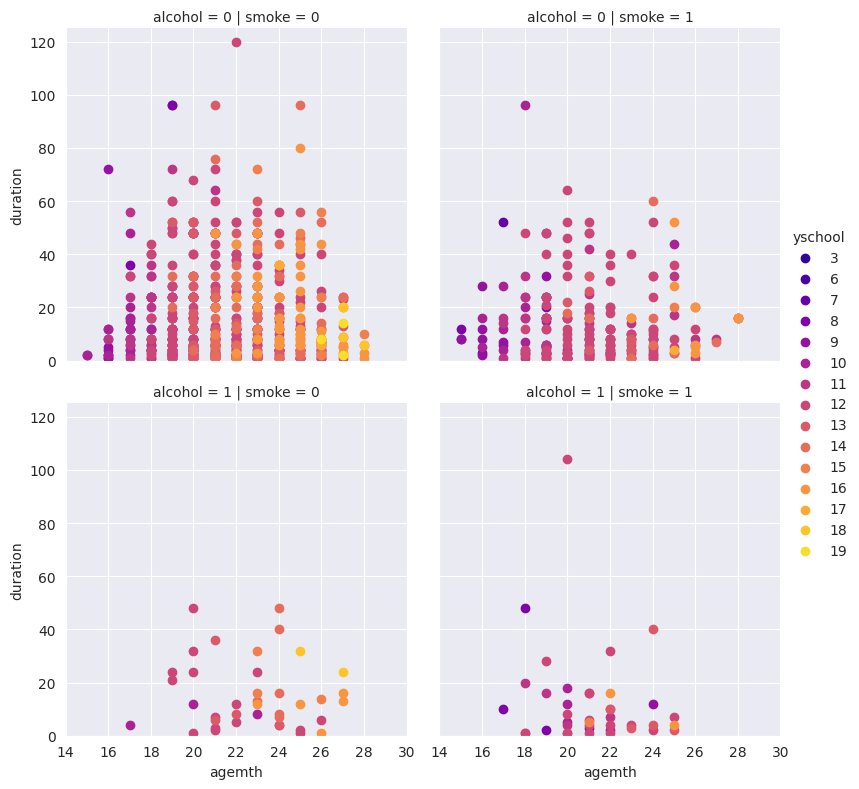

In [19]:
ylim = (0, 125)
xlim = (14, 30)
fg = sns.FacetGrid(data, col="smoke", row="alcohol", hue='yschool', palette='plasma', height=4, aspect=1, ylim=ylim, xlim=xlim) 
fg.map(plt.scatter, "agemth", "duration").add_legend() # sns.stripplot

Можем заметить, что влияние алкоголя оказывает наибольшее влияние на продолжительность кормления. Обратим внимание, что в группе курящих и выпивающих женщин наименьшая средняя продолжительность кормления (около 25 нед.) и только здесь отсутвуют данные о матерях старше 25, что можем свидетельствовать о проблемах с зачатием на фоне времдных привычек. Т

Также видим корреляцию между курением матери и годами ее обучения - курящие женщины менее образованы. 
К тому же видим, что уровень образования, очевидно, напрямую зависит от возраста матери.

In [8]:
# Создание нового признака - образование
data2 = pd.DataFrame(data)
data2['education']=data2['yschool'].map(lambda x: 'only school (or less)' if x < 13 else 'higher education')

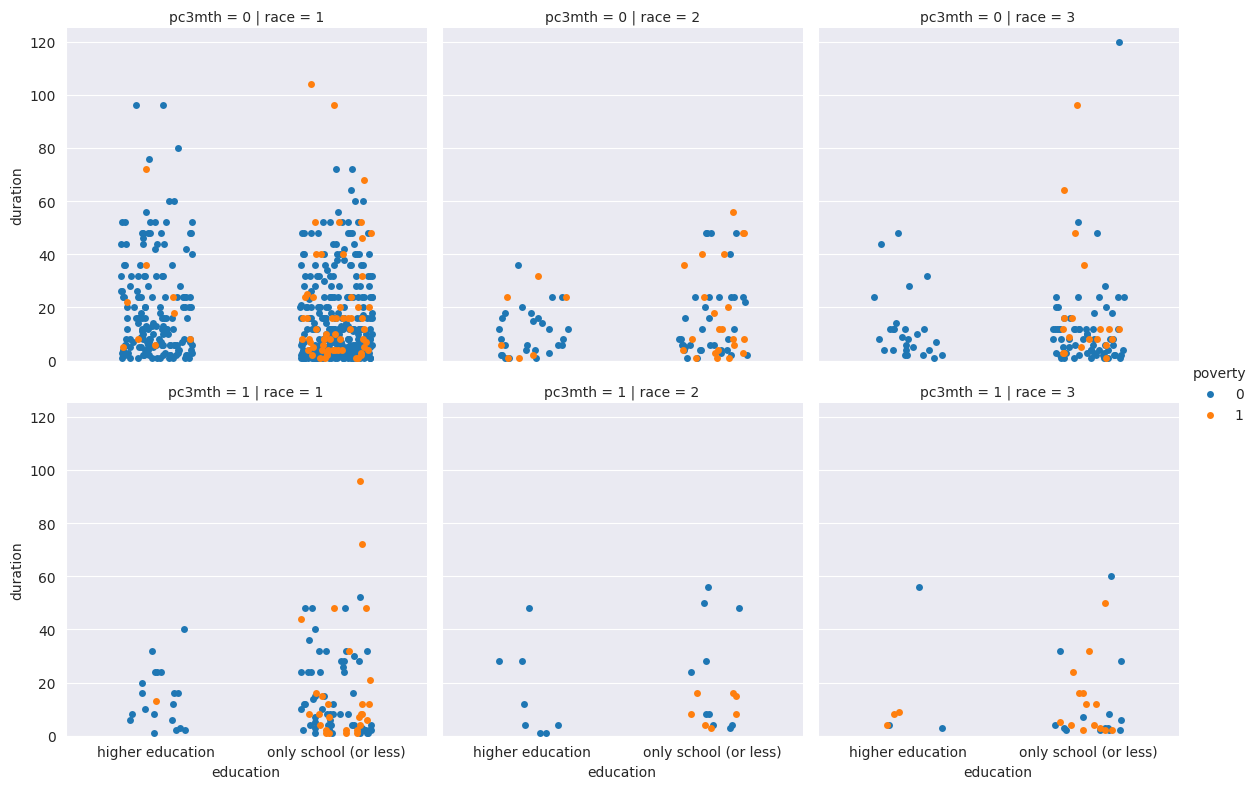

In [9]:
ylim2 = (0, 125)
fg2 = sns.FacetGrid(data2, col="race", row="pc3mth", hue='poverty', height=4, aspect=1, ylim=ylim2) 
fg2.map(sns.stripplot, "education", "duration", jitter=0.2).add_legend()

Здесь видим, что бедность матери не особо влияет на продолжительность кормления. Зато она значительно коррелирует с уровнем образования - женщины окончившие школу (образование более 12 лет) практически не имеют материальных трудностей.

## 2. Pair-сетка

In [10]:
pair = data[['duration', 'agemth', 'ybirth', 'yschool','smoke']]

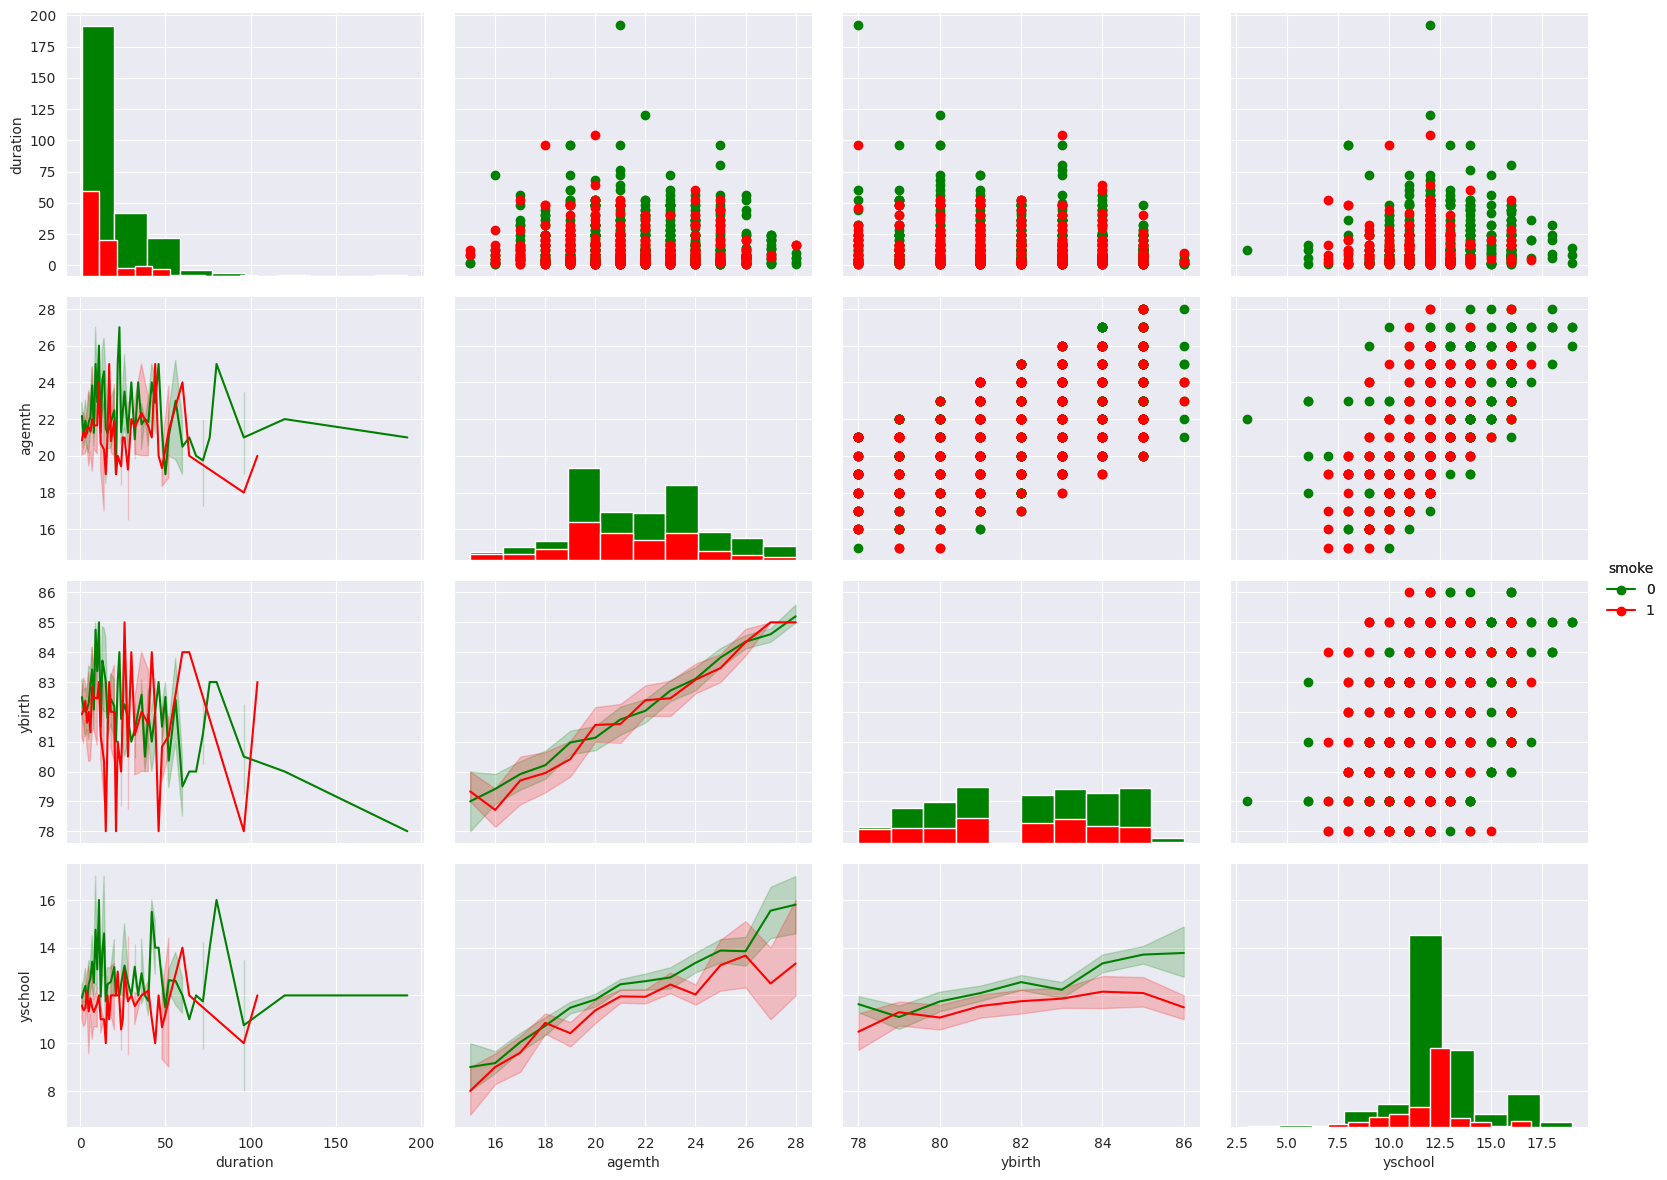

In [22]:
pg = sns.PairGrid(pair, hue='smoke', palette=['g','r'], corner=False, height=3, aspect=1.3)
pg.map_diag(plt.hist)
pg.map_upper(plt.scatter).add_legend()
pg.map_lower(sns.lineplot).add_legend()

Здесь еще раз увидели связь между курением и оразованием матери (yschool-agemth / yschool-ybirth)

### 3. Joint-сетка

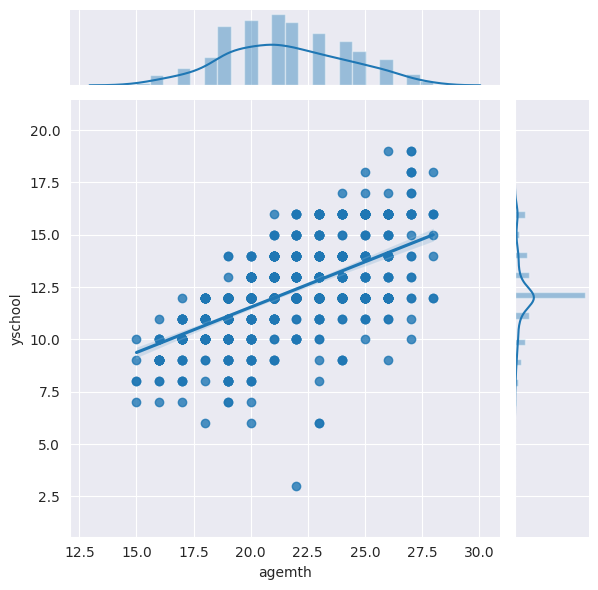

In [39]:
jg = sns.JointGrid(x='agemth', y='yschool', data=data2)#, hue='poverty'
jg.plot_joint(sns.regplot)
jg.plot_marginals(sns.distplot)

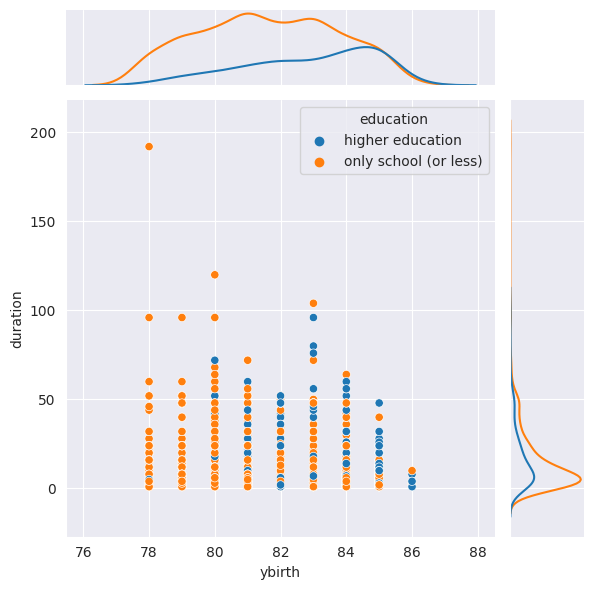

In [54]:
jg = sns.JointGrid(x='ybirth', y='duration', data=data2, hue='education')#, hue='poverty'
jg.plot_joint(sns.scatterplot)
jg.plot_marginals(sns.kdeplot)

Интересное наблюдение: число матерей с высшим образованием увеличивается с годами. 

В эти годы как раз наблюдался рост образования в США:

> *С конца 60-х годов XX-го столетия в США наблюдается постоянный спад в спросе на малоквалифицированный труд. Рост числа студентов в США легко объясним: доходы, окончивших колледж, в среднем заметно выше, чем у их сверстников, ограничившихся средней школой. Только за период с 1970 г. по 1992 г. в США удельный вес лиц, получивших среднее образование, возрос в структуре рабочей силы с 52% до 76%, а получивших законченное и незаконченное высшее образование - с 21% до 38%.*
[Источник](https://monographies.ru/ru/book/section?id=7190)

[Эволюция в системе образования в США](https://cyberleninka.ru/article/n/evolyutsiya-v-sisteme-obrazovaniya-v-ssha/viewer)



**Выводы:** Благодаря инструментам управления компоновки диаграмм еще раз убедились в результатах полученных в прошлых лабораторных работах, а также заметили интересную закономерность роста образованности у женщин США.